In [1]:
import tensorflow as tf

def create_model():
    base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    # 冻结CNN层，不参与训练
    base_model.trainable = False
    # 引入新的全局均值汇聚层
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    # 定义最后一层，也就是分类层
    prediction_layer = tf.keras.layers.Dense(units=2, activation='softmax')
    # 创建模型，输入数据，弹出输出
    model = tf.keras.Sequential([base_model, global_average_layer, prediction_layer])
    return model

if __name__ == '__main__':
    model = create_model()
    model.summary() #显示模型参数

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [1]:
import os
import matplotlib.pyplot as plt

# 定义读取花卉数据的函数
def read_flower_data(folder_name):
    folders = os.listdir(folder_name) # 列出文件夹中所有花卉类型的文件夹名称
    flower_names = [] # 存储每个花卉类型的名称
    flower_nums = [] # 存储每个花卉类型的图片数量
    for folder in folders:   # 构建该花卉类型文件夹的路径
        folder_path = os.path.join(folder_name, folder)
        images = os.listdir(folder_path)
        images_num = len(images)
        print("{}:{}".format(folder, images_num))
        flower_names.append(folder)
        flower_nums.append(images_num)

    return flower_names, flower_nums
if __name__ == '__main__':
     x, y = read_flower_data("d:/flower/flower_photos")# 读取花卉数据

daisy:633
dandelion:898
roses:641
sunflowers:699
test:8
train:8
tulips:799
val:8


In [2]:
import os
import random
from shutil import copy2

def data_set_split(src_data_folder, target_data_folder, train_scale=0.8, val_scale=0.0, test_scale=0.2):
    # 获取原始数据集中所有类别的名称
    class_names = os.listdir(src_data_folder)

    # 在目标目录下创建 train/val/test 文件夹，并在其中创建与原始数据集相同的类别文件夹
    split_names = ['train', 'val', 'test']
    for split_name in split_names:
        split_path = os.path.join(target_data_folder, split_name)
        if os.path.isdir(split_path):
            pass
        else:
            os.mkdir(split_path)

        for class_name in class_names:
            class_split_path = os.path.join(split_path, class_name)
            if os.path.isdir(class_split_path):
                pass
            else:
                os.mkdir(class_split_path)

    # 遍历所有类别，对每个类别的数据划分并复制到对应的文件夹中
    for class_name in class_names:
        current_class_data_path = os.path.join(src_data_folder, class_name)
        current_all_data = os.listdir(current_class_data_path) # 获取当前类别的所有图像文件名
        current_data_length = len(current_all_data)  # 获取当前类别的图像总数
        current_data_index_list = list(range(current_data_length))
        random.shuffle(current_data_index_list)  # 在列表中随机排序，以实现随机划分

        # 对当前类别的数据进行指定比例的划分
        train_folder = os.path.join(os.path.join(target_data_folder, 'train'), class_name)
        val_folder = os.path.join(os.path.join(target_data_folder, 'val'), class_name)
        test_folder = os.path.join(os.path.join(target_data_folder, 'test'), class_name)
        train_stop_flag = round(current_data_length * train_scale)  # 计算训练集截止下标
        val_stop_flag = round(current_data_length * (train_scale + val_scale))  # 计算验证集截止下标
        current_idx = 0
        train_num = 0
        val_num = 0
        test_num = 0
        for i in current_data_index_list:
            src_img_path = os.path.join(current_class_data_path, current_all_data[i])
            if current_idx < train_stop_flag:
                copy2(src_img_path, train_folder)
                train_num = train_num + 1
            elif current_idx < val_stop_flag:
                copy2(src_img_path, val_folder)
                val_num = val_num + 1
            else:
                copy2(src_img_path, test_folder)
                test_num = test_num + 1

            current_idx = current_idx + 1

        # 输出当前类别数据划分的统计信息
        print("***************{}***************".format(class_name))
        print("{} 类按照 {}: {}: {} 的比例划分完成,一共 {} 张图像".format(class_name, train_scale, val_scale, test_scale, current_data_length))
        print("训练集 {}: {} 张".format(train_folder, train_num))
        print("验证集 {}: {} 张".format(val_folder, val_num))
        print("测试集 {}: {} 张".format(test_folder, test_num))


if __name__ == '__main__':
    src_data_folder = "d:/flower/flower_photos"
    target_data_folder = "d:/flower/flower_photos"
    data_set_split(src_data_folder, target_data_folder)


***************daisy***************
daisy 类按照 0.8: 0.0: 0.2 的比例划分完成,一共 633 张图像
训练集 d:/flower/flower_photos\train\daisy: 506 张
验证集 d:/flower/flower_photos\val\daisy: 0 张
测试集 d:/flower/flower_photos\test\daisy: 127 张
***************dandelion***************
dandelion 类按照 0.8: 0.0: 0.2 的比例划分完成,一共 898 张图像
训练集 d:/flower/flower_photos\train\dandelion: 718 张
验证集 d:/flower/flower_photos\val\dandelion: 0 张
测试集 d:/flower/flower_photos\test\dandelion: 180 张
***************roses***************
roses 类按照 0.8: 0.0: 0.2 的比例划分完成,一共 641 张图像
训练集 d:/flower/flower_photos\train\roses: 513 张
验证集 d:/flower/flower_photos\val\roses: 0 张
测试集 d:/flower/flower_photos\test\roses: 128 张
***************sunflowers***************
sunflowers 类按照 0.8: 0.0: 0.2 的比例划分完成,一共 699 张图像
训练集 d:/flower/flower_photos\train\sunflowers: 559 张
验证集 d:/flower/flower_photos\val\sunflowers: 0 张
测试集 d:/flower/flower_photos\test\sunflowers: 140 张
***************tulips***************
tulips 类按照 0.8: 0.0: 0.2 的比例划分完成,一共 799 张图像
训练集 d:/flower/

Found 7340 files belonging to 8 classes.
Using 5872 files for training.
Found 7340 files belonging to 8 classes.
Using 1468 files for validation.
Epoch 1/10


D:\ANACONDA\envs\python\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1468/1468 [==============================] - 61s 40ms/step - loss: 1.6314 - accuracy: 0.3730 - val_loss: 1.4020 - val_accuracy: 0.3958
Epoch 2/10
1468/1468 [==============================] - 50s 34ms/step - loss: 1.3885 - accuracy: 0.4137 - val_loss: 1.3377 - val_accuracy: 0.4040
Epoch 3/10
1468/1468 [==============================] - 50s 34ms/step - loss: 1.3077 - accuracy: 0.4268 - val_loss: 1.3124 - val_accuracy: 0.4019
Epoch 4/10
1468/1468 [==============================] - 49s 33ms/step - loss: 1.2641 - accuracy: 0.4293 - val_loss: 1.3039 - val_accuracy: 0.3985
Epoch 5/10
1468/1468 [==============================] - 50s 34ms/step - loss: 1.2388 - accuracy: 0.4375 - val_loss: 1.3024 - val_accuracy: 0.3883
Epoch 6/10
1468/1468 [==============================] - 49s 33ms/step - loss: 1.2194 - accuracy: 0.4378 - val_loss: 1.2980 - val_accuracy: 0.3760
Epoch 7/10
1468/1468 [==============================] - 49s 33ms/step - loss: 1.1965 - accuracy: 0.4484 - val_loss: 1.2980 - val_accura

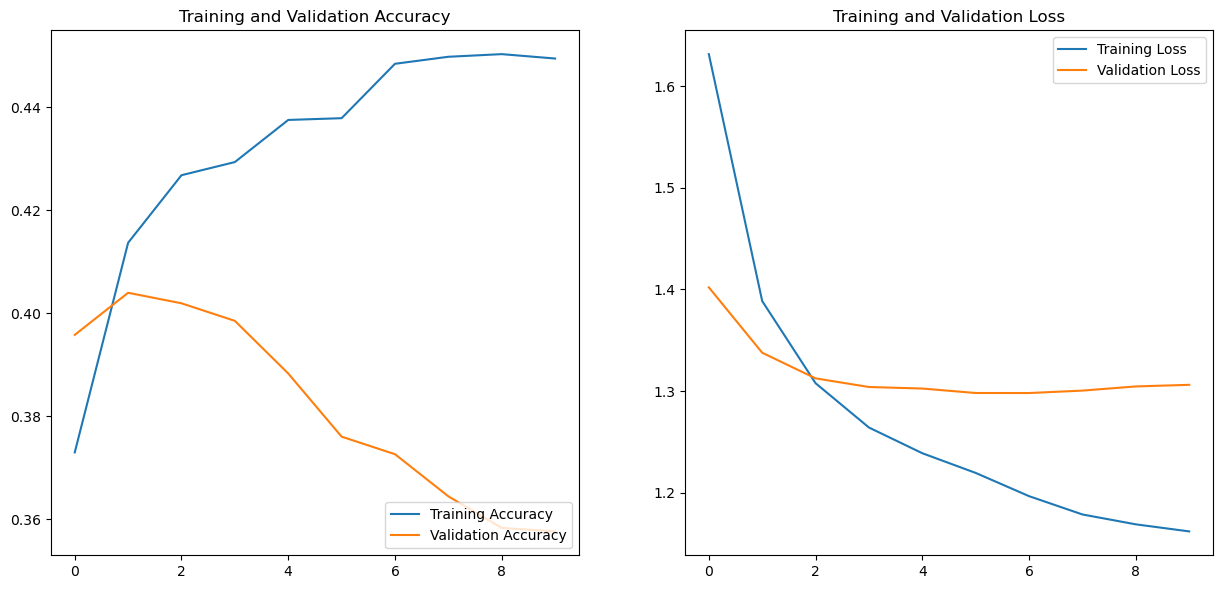

NameError: name 'history' is not defined

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

def data_load(data_dir, img_height, img_width, batch_size):
    # 数据加载，按照8:2的比例加载花卉数据
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        label_mode='categorical',
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    # 读取数据后对其重新调整大小
    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        label_mode='categorical',
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    class_names = train_ds.class_names
    # 标签被编码为分类变量，保留一定比例数据作验证
    return train_ds, val_ds, class_names

def model_create(class_names):
    # 使用 MobileNetV2 预训练模型
    base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                   include_top=False,
                                                   weights='imagenet')
    base_model.trainable = False

    # 增加自定义分类输出层
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)

    # 编译模型
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def model_load():
    model_path = "d:/flower/models/mobilenet_flower.h5"
    model = tf.keras.models.load_model(model_path)
    return model

def show_loss_acc(history):
    # 绘制训练及验证集的损失值和准确率
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def train(epochs, is_transfer=False):   # 加载数据集和类别名称
    train_ds, val_ds, class_names = data_load("d:/flower/flower_photos", 224, 224, 4)# 判断使用迁移学习还是创建新模型
    if is_transfer:
        model = model_load()
    else:
        model = model_create(class_names)

    # 训练模型
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

    # 保存训练模型
    model_path = "d:/flower/models/mobilenet_flower.h5"
    model.save(model_path)

    show_loss_acc(history) # 绘制loss-accuracy曲线

if __name__ == '__main__':
    train(epochs=10)  # 训练模型，epochs为训练轮次，默认为10次

import tensorflow as tf
import matplotlib.pyplot as plt

# 数据加载函数，用于加载花卉数据，并对其进行重新调整
def data_load(data_dir, img_height, img_width, batch_size):
    # 加载训练数据集（80%）
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        label_mode='categorical',    # 标签被编码为分类变量
        validation_split=0.2,       # 保留一定比例数据作验证
        subset="training",          # 指定数据集子集为“训练数据集”
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    # 加载验证数据集（20%）
    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        label_mode='categorical',
        validation_split=0.2,
        subset="validation",        # 指定数据集子集为“验证数据集”
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    # 获取花卉类别的名称
    class_names = train_ds.class_names

    # 返回训练和验证数据集，以及花卉类别名称
    return train_ds, val_ds, class_names

# 模型创建函数，用于创建 MobileNetV2 模型
def model_create(class_names):
    # 使用 MobileNetV2 预训练模型
    base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                   include_top=False,
                                                   weights='imagenet')
    # 冻结预训练的模型（不参与训练）
    base_model.trainable = False

    # 添加自定义的分类输出层
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)

    # 编译模型，设置损失函数、优化器和评估指标
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 模型加载函数，用于加载已经训练好的模型
def model_load():
    model_path = "d:/flower/models/mobilenet_flower.h5"
    model = tf.keras.models.load_model(model_path)
    return model

# 训练过程可视化函数，用于绘制训练过程中的结果
def show_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # 绘制训练及验证集的损失值和准确率
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()), 1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0, 1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()



In [4]:
import tensorflow as tf

def data_load(data_dir, img_height, img_width, batch_size):
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        label_mode='categorical',
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        label_mode='categorical',
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    class_names = train_ds.class_names
    return train_ds, val_ds, class_names

def model_load():
    model_path = "d:/flower/models/mobilenet_flower.h5"
    model = tf.keras.models.load_model(model_path)
    return model

def test(is_transfer=True):
    _, val_ds, class_names = data_load("d:/flower/flower_photos", 224, 224, 4)

    if is_transfer:
        model = model_load()

    model.summary()

    loss, accuracy = model.evaluate(val_ds)
    print('Test accuracy:', accuracy)

if __name__ == '__main__':
    test(True)

Found 7340 files belonging to 8 classes.
Using 5872 files for training.
Found 7340 files belonging to 8 classes.
Using 1468 files for validation.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                               

In [5]:
import tensorflow as tf
from PyQt5.Qt import *
import cv2
from PIL import Image
import numpy as np
import sys

class MainWindow(QWidget):
    def __init__(self):
        super().__init__()
        # 程序界面和控件初始化
        self.model = tf.keras.models.load_model('d:/flower/models/mobilenet_flower.h5')
        self.class_names = ['维菊', '演公英', '玫瑰', '向日葵', '郁金香']
        self.to_predict_name = None
        self.initUI()

    def initUI(self):
        self.setWindowTitle('花卉识别')
        self.setWindowIcon(QIcon('images/logo.png'))
        self.resize(700, 500)
        # 左边的窗口控件
        left_widget = QWidget()
        left_layout = QVBoxLayout()
        img_title = QLabel("图像")
        img_title.setFont(QFont('楷体', 15))
        img_title.setAlignment(Qt.AlignCenter)
        self.img_label = QLabel()
        self.img_label.setPixmap(QPixmap('images/init.png'))  # 初始图像显示
        left_layout.addWidget(img_title)
        left_layout.addWidget(self.img_label, 1, Qt.AlignCenter)
        left_widget.setLayout(left_layout)

        # 右边的窗口控件
        right_widget = QWidget()
        right_layout = QVBoxLayout()
        btn_change = QPushButton("选择图像")
        btn_change.setFont(QFont('楷体', 15))
        btn_change.clicked.connect(self.change_img)
        btn_predict = QPushButton("识别")
        btn_predict.setFont(QFont('楷体', 15))
        btn_predict.clicked.connect(self.predict_img)
        label_result = QLabel("识别结果")
        label_result.setFont(QFont('楷体', 16))
        self.result = QLabel("待识别")
        self.result.setFont(QFont('楷体', 24))

        right_layout.addStretch()
        right_layout.addWidget(label_result, 0, Qt.AlignCenter)
        right_layout.addStretch()
        right_layout.addWidget(self.result, 0, Qt.AlignCenter)
        right_layout.addStretch()
        right_layout.addWidget(btn_change)
        right_layout.addWidget(btn_predict)
        right_layout.addStretch()
        right_widget.setLayout(right_layout)

        # 在主窗口内添加左右两个子窗口
        main_layout = QHBoxLayout()
        main_layout.addWidget(left_widget)
        main_layout.addWidget(right_widget)
        self.setLayout(main_layout)

    def change_img(self):
        """
        选择本地文件，更改要预测的图像
        """
        img_name, _ = QFileDialog.getOpenFileName(self, "选择图像", ".", "Image Files(*.jpg *.jpeg *.png)")
        if img_name:
            self.to_predict_name = img_name
            img_init = cv2.imread(self.to_predict_name)
            img_init = cv2.resize(img_init, (224, 224))
            cv2.imwrite('d:/flower.png', img_init)  # 在本地保存选择的图像
            self.img_label.setPixmap(QPixmap('d:/flower.png'))

    def predict_img(self):
        """
        运行图像分类器，更新预测结果标签
        """
        if not self.to_predict_name:
            self.result.setText("请先选择一张要识别的图像！")
            return
        img = Image.open(self.to_predict_name)
        img = np.asarray(img) #将输入的转换为数组
        img = cv2.resize(img, (224, 224))

        try:
            outputs = self.model.predict(img.reshape(1, 224, 224, 3))
            result_index = np.argmax(outputs) #取出数组中最大的索引
            print('预测概率矩阵:', outputs)
            print('预测结果索引:', result_index) #读出数组class_names对应索引的位置
            result = self.class_names[result_index]
            self.result.setText(result)
        except Exception as e:
            self.result.setText('识别失败：{}'.format(str(e))) #把识别结果显示出来

if __name__ == '__main__':  # 创建 QApplication 实例，是 PyQt5 程序的主要入口点
    app = QApplication(sys.argv)  # ygt 窗口必须在 QApplication 方法中使用
    x = MainWindow() # 生成Mainwindow 类的实例x
    x.show() #x调用 show 方法
    sys.exit(app.exec_()) # 消息结束时，进程结束并返回 0，再调用 sys.exit(0) 退出程序

1/1 [==============================] - 1s 687ms/step
预测概率矩阵: [[3.9145243e-01 1.2259679e-02 1.6630482e-03 4.4500314e-02 7.7999093e-02
  4.7051850e-01 1.6045405e-03 2.4033345e-06]]
预测结果索引: 5
1/1 [==============================] - 0s 63ms/step
预测概率矩阵: [[2.1406231e-03 1.2534829e-02 3.5319778e-03 4.7342891e-01 1.5483730e-01
  3.5095760e-01 2.5687588e-03 2.0636428e-09]]
预测结果索引: 3


SystemExit: 0

D:\ANACONDA\envs\python\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
